# Cross validation

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn import  metrics

Rozważmy następujący zbiór punktów:

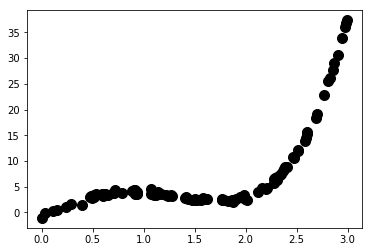

In [2]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,0.3).rvs(len(x))
plt.plot(x, y, 'ok', ms=10);
plt.show()

In [3]:
x=np.vstack(x)

# k-fold

In [4]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=3)
kf.get_n_splits(x)

3

In [5]:
scores = list()
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
for train_index, test_index in kf.split(x):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    scores.append(model2.fit(X_train, y_train).score(X_test, y_test))
    print(model2.fit(X_train, y_train).score(X_test, y_test))
print(scores)

0.714566032733
0.807959952828
0.815859442471
[0.71456603273268016, 0.80795995282803723, 0.81585944247140241]


In [6]:
kfold = KFold(n_splits=3)
[model2.fit(x[train], y[train]).score(x[test], y[test]) for train, test in kfold.split(x)]

[0.71456603273268016, 0.80795995282803723, 0.81585944247140241]

# cross_val_score

In [7]:
from sklearn.model_selection import cross_val_score
cross_val_score(model2, x, y, cv=kfold)

array([ 0.71456603,  0.80795995,  0.81585944])

In [8]:
cross_val_score(model2, x, y, cv=kfold, scoring='r2')

array([ 0.71456603,  0.80795995,  0.81585944])

In [9]:
cross_val_score(model2, x, y, cv=kfold, scoring='neg_median_absolute_error')

array([-3.20533876, -2.93019917, -3.03213209])

# cross_val_predict

In [10]:
from sklearn.model_selection import cross_val_predict
cross_val_predict(model2, x, y, cv=kfold)

array([  0.4935703 ,   8.89898874,   2.55064348,   6.15112824,
        20.42396387,   0.5031917 ,  16.33810264,  18.14606163,
        23.57205029,  10.33096144,   0.46431747,  12.05072317,
         6.94769464,   7.07731058,  13.31967581,  13.40258756,
         4.53519901,  18.27881877,   4.98980338,   1.65439589,
        11.8369072 ,   5.00101223,   0.43131613,   5.40724905,
         5.84700468,  10.17871449,   0.8471506 ,   9.65400027,
         1.15720697,   0.52331141,  27.62332191,   0.70618716,
         0.65364526,   0.8902162 ,   4.33373323,   0.74051926,
        10.65539249,   0.14489314,   1.14757336,   3.26995435,
         0.12423073,   0.24392669,  18.72438759,   0.99870354,
         0.11366732,   3.38058393,  25.14250193,   0.80972791,
         0.11967145,  22.95746576,   0.56221211,  26.50657155,
         9.8489118 ,   1.52505703,   4.271364  ,   5.12190962,
        12.17362198,  16.48022331,  10.15481017,  13.68432434,
         1.86581669,   1.28697176,  23.21598718,   3.40